In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Stock Prices Data Set.csv')  # Adjust path if needed

# View basic info
print(df.head())
print(df.info())


  symbol        date      open      high       low     close      volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943.0
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957.0
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711.0
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061.0
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108018 entries, 0 to 108017
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  108018 non-null  object 
 1   date    108018 non-null  object 
 2   open    108018 non-null  float64
 3   high    108018 non-null  float64
 4   low     108018 non-null  float64
 5   close   108017 non-null  float64
 6   volume  108017 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.8+ MB
None


In [11]:
print(df.columns.tolist())


['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']


In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Stock Prices Data Set.csv')  # Adjust path if needed

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop irrelevant columns (symbol and date won't help model directly)
df.drop(['symbol', 'date'], axis=1, inplace=True)

# Create binary target: Predict if 'close' > 'open'
df['Target'] = (df['close'] > df['open']).astype(int)

# Feature-Target split
X = df.drop(['Target'], axis=1)
y = df['Target']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     10464
           1       0.89      1.00      0.94     11140

    accuracy                           0.94     21604
   macro avg       0.94      0.93      0.94     21604
weighted avg       0.94      0.94      0.94     21604

ROC AUC Score: 0.998117063067218


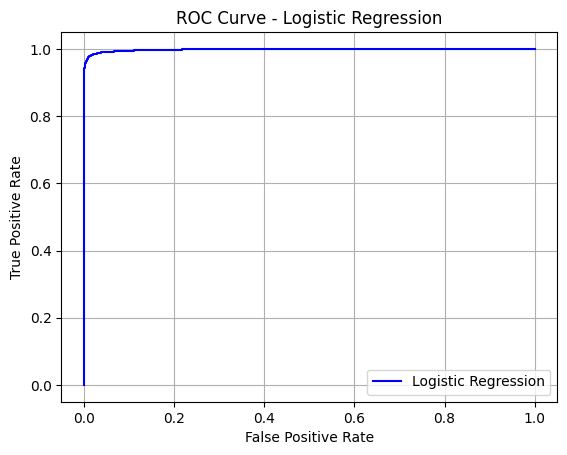

In [13]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 📂 Load dataset
df = pd.read_csv('/content/Stock Prices Data Set.csv')  # Update path as needed

# 🧹 Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop(['symbol', 'date'], axis=1, inplace=True)

# 🎯 Create binary target: 1 if close > open, else 0
df['Target'] = (df['close'] > df['open']).astype(int)

# 🔍 Split features and target
X = df.drop(['Target'], axis=1)
y = df['Target']

# ⚖️ Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📈 Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Predict and evaluate
y_pred = model.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# 📉 Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()



🌲 Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10464
           1       0.95      0.95      0.95     11140

    accuracy                           0.95     21604
   macro avg       0.95      0.95      0.95     21604
weighted avg       0.95      0.95      0.95     21604



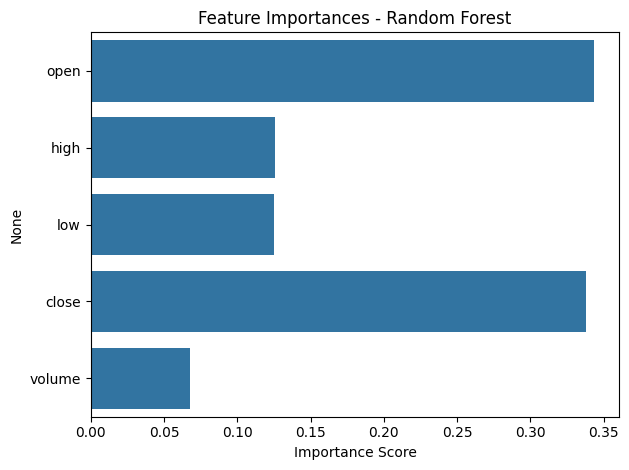

In [14]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load the dataset
df = pd.read_csv('/content/Stock Prices Data Set.csv')  # Replace path if needed

# 🧹 Data Preprocessing (Task 1)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop(['symbol', 'date'], axis=1, inplace=True)
df['Target'] = (df['close'] > df['open']).astype(int)

X = df.drop(['Target'], axis=1)
y = df['Target']

# 🔁 Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ TASK 3: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# 🎯 Feature Importance
feature_names = X.columns
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
